In [4]:
cd /home/mome/code/statistician

/home/mome/code/statistician


In [5]:
from hypara import join, prod, to_space, R, N, pprint, to_dot

In [8]:
para = to_space({
    'alpha' : R,
    'l1_ratio' : R,
    'maxorder' : N[1:],
    'bias' : {True, False},})

In [16]:
d = to_space({
    'lambda' : R,
    'gamma' : N[0:],
})

DEBUG:hypara.core.display:to_dot:enter ProductSpace


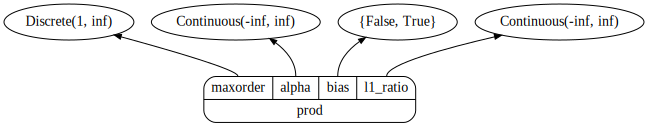

In [9]:
to_dot(para)

DEBUG:hypara.core.display:to_dot:enter ProductSpace


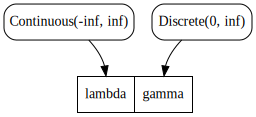

In [18]:
to_dot(d)

In [22]:
a = to_space(R[1:5])
js = join(a,d)
js[1]['gamma']

Discrete(0, inf)

In [23]:
print(js)
print('\n---------------------------------------------------------------------------------\n')
pprint(js)
print('\n---------------------------------------------------------------------------------\n')
js

{Continuous(1, 5), [lambda=Continuous(-inf, inf), gamma=Discrete(0, inf)]}

---------------------------------------------------------------------------------

{
    Continuous(1, 5),
    [
        lambda = Continuous(-inf, inf),
        gamma = Discrete(0, inf),
    ],
}

---------------------------------------------------------------------------------



JoinedSpace([Continuous(1, 5), ProductSpace(Product(lambda=Continuous(-inf, inf), gamma=Discrete(0, inf)))])

In [ ]:
op1 = Operator(lambda a,b,c : a+b*c, 'dings')
op2 = Operator(lambda a : a**2, 'quad')

p = sp({
    op1(a=N[:10], b=N[:10], c=N[:10]),
    op2(N[:10]),
    op1(1, foo='sahne'),
})

In [ ]:
c = op1(1)

In [ ]:
type(c.domain[0])

In [ ]:
prod([1,2,3],s=4)

In [ ]:
print(pformat(p, linebreaks=False, str_func=repr))
type(p)

In [ ]:
a = space(
    {'a': 1,
     'b' : 2
    }
)

In [ ]:
p

In [ ]:
(1,2) + (3,4)

DEBUG:hypara.core.display:to_dot:enter JoinedSpace
DEBUG:hypara.core.display:to_dot:enter ProductSpace


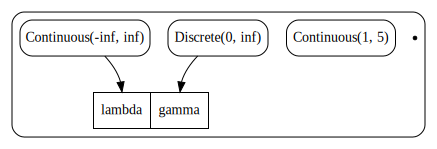

In [24]:
to_dot(js)

In [ ]:
c

In [ ]:
c.domain.args

In [ ]:
k = {'A','B'}

In [ ]:
from hypara.spaces import add, mul

In [ ]:
type(G.domain[0])

In [ ]:
%autoreload

In [ ]:
import os, sys
sys.path.insert(1, os.path.abspath('..'))
from hypara.spaces import join, _is_atomic, pprint, mul, add, space

In [ ]:
K = {1,2}
G = join(K)
print(G)

In [ ]:
G <<= mul(K, G) | add(K, G) | K

In [ ]:
pprint(G)

In [ ]:
from hyparaspaces import TempCollection

In [ ]:
tyep?

In [ ]:
type?

In [ ]:
repr(space(K) | K)

In [ ]:
a = mul(K, G) | add(K, G) | K

In [ ]:
a

In [ ]:
import GPy